<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Beyond-GMM---Kernel-Density-Estimation-(KDE)" data-toc-modified-id="Beyond-GMM---Kernel-Density-Estimation-(KDE)-1">Beyond GMM - Kernel Density Estimation (KDE)</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-2">Learning Outcomes</a></span></li><li><span><a href="#Parametric-Models" data-toc-modified-id="Parametric-Models-3">Parametric Models</a></span></li><li><span><a href="#Nonparametric-Models" data-toc-modified-id="Nonparametric-Models-4">Nonparametric Models</a></span></li><li><span><a href="#Two-Types-of-Density-Clustering" data-toc-modified-id="Two-Types-of-Density-Clustering-5">Two Types of Density Clustering</a></span></li><li><span><a href="#Kernel-Density-Estimation-(KDE)" data-toc-modified-id="Kernel-Density-Estimation-(KDE)-6">Kernel Density Estimation (KDE)</a></span></li><li><span><a href="#Kernel-Density-Estimation-(KDE)" data-toc-modified-id="Kernel-Density-Estimation-(KDE)-7">Kernel Density Estimation (KDE)</a></span></li><li><span><a href="#What-is-a-Kernel?" data-toc-modified-id="What-is-a-Kernel?-8">What is a Kernel?</a></span></li><li><span><a href="#Applying-Kernels" data-toc-modified-id="Applying-Kernels-9">Applying Kernels</a></span></li><li><span><a href="#KDE-Kernels" data-toc-modified-id="KDE-Kernels-10">KDE Kernels</a></span></li><li><span><a href="#Gaussian-kernels" data-toc-modified-id="Gaussian-kernels-11">Gaussian kernels</a></span></li><li><span><a href="#KDE--Bandwidth" data-toc-modified-id="KDE--Bandwidth-12">KDE  Bandwidth</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-13">Check for understanding</a></span></li><li><span><a href="#Kernel-density-estimation-(KDE)-for-nonparametric-density-based-clustering" data-toc-modified-id="Kernel-density-estimation-(KDE)-for-nonparametric-density-based-clustering-14">Kernel density estimation (KDE) for nonparametric density-based clustering</a></span></li><li><span><a href="#Kernel-Density-Estimation-Advantages:" data-toc-modified-id="Kernel-Density-Estimation-Advantages:-15">Kernel Density Estimation Advantages:</a></span></li><li><span><a href="#What-can-you-do-with-KDE-estimates?" data-toc-modified-id="What-can-you-do-with-KDE-estimates?-16">What can you do with KDE estimates?</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-17">Takeaways</a></span></li><li><span><a href="#Sources-of-Inspiration" data-toc-modified-id="Sources-of-Inspiration-18">Sources of Inspiration</a></span></li></ul></div>

<center><h2>Beyond GMM - Kernel Density Estimation (KDE)</h2></center>

<center><img src="../images/kde_12.png" width="50%"/></center>

<center><h2>Learning Outcomes</h2></center>

__By the end of this session, you should be able to__:

- Explain the differences between parametric and nonparametric models.
- Describe how histogram is a parametric model and Kernel Density Estimation (KDE) is a nonparameteric model.
- Fit a Kernel Density Estimation (KDE) to data.


<center><h2>Parametric Models</h2></center>

Assume a functional form of the data, thus there is a fixed number of parameters to fit during modeling.

<center><h2>Nonparametric Models</h2></center>
<br>

Do __not__ assume a functional form of the data, thus there are no fixed number of parameters to fit during training.



<center><h2>Two Types of Density Clustering</h2></center>

- Gaussian Mixture Model (GMM) can be used for parametric density clustering
- Kernel Density Estimation (KDE) can be used for nonparametric density clustering

<center><h2>Kernel Density Estimation (KDE)</h2></center>

<center><img src="../images/kde_99.png" width="70%"/></center>

A non-parametric method to estimate the probability density function of a random variable.

<center><h2>Kernel Density Estimation (KDE)</h2></center>
<br>
$$ \hat f(x) = \frac{1}{nh} \sum_{i=1}^n K \left(\frac{x - x_i}{h}\right)$$

KDE Hyperparameters: 

1. Kernel (K) - a weighting function applied to each datapoint.
1. Bandwidth of kernel  (h) - controls the size of the kernel. 

<center><h2>What is a Kernel?</h2></center>

In general, a kernel is a non-negative function that integrates to one and has mean zero.

A kernel is filter or weighting function that magnifies different values of the data differently.

In density estimation, a kernel transforms each data point into a distribution.

In [2]:
reset -fs

In [3]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np

palette = "Dark2"
%matplotlib inline

In [4]:
from sklearn.neighbors import KernelDensity

In [5]:
# Create data
for value in [4.13, 5.94, 5.45]:
        
        X = np.array([value])[:, np.newaxis]
        # Fit KDE
        kde = KernelDensity(kernel='tophat', bandwidth=.5).fit(X)

        # Visualization
        x_values = np.linspace(3, 7, 1000)[:, np.newaxis]
        predicted = np.exp(kde.score_samples(x_values)) 
        plt.fill(x_values[:, 0], predicted, fc='#002366');
        plt.show();
        display.display(plt.gcf());
        input('Press return to see next figure: ')
        display.clear_output(wait=True);
        

<Figure size 432x288 with 0 Axes>

<center><h2>Applying Kernels</h2></center>

<center><img src="../images/passing_kernel.png" width="45%"/></center>

$$ \hat f(x) = \frac{1}{nh} \sum_{i=1}^n K \left(\frac{x - x_i}{h}\right)$$
1. For each datapoint, apply kernel to the value ($K \left(\frac{x - x_i}{h}\right)$).
1. Sum the result ($\sum_{i=1}^n$).
1. Run a pdf by normalizing ($ \frac{1}{nh}$).

<center><h2>KDE Kernels</h2></center>

<center><img src="../images/sphx_glr_plot_kde_1d_0021.png" width="60%"/></center>

Kernel specifies the shape of the distribution placed at each point.

Scikit-Learn's Density Estimation supports one of [six kernels](https://scikit-learn.org/stable/modules/density.html).

<center><img src="../images/3gspf7.jpg" width="65%"/></center>

<center><h2>Gaussian kernels</h2></center>

<center><img src="../images/gauss_kernel.png" width="100%"/></center>

<center>A Gaussian kernel has no parameters to estimate. <br>μ is fixed to the data point and σ is one.</center>

<center><h2>KDE  Bandwidth</h2></center>

<center><img src="../images/bandwidth.png" width="100%"/></center>

The bandwidth is a smoothing parameter that controls the spread of the kernel.

<center><h2>Check for understanding</h2></center>

Silently think about...

How does bandwidth impact Bias and Variance?

What happens when you pick a small bandwidth? A large bandwidth?

<center><img src="../images/bandwidth.png" width="75%"/></center>

A small bandwidth results in:

- A small, unsmooth distribution.
- Low bias since the training dataset is well fit.
- High variance since any small changes in datapoints would results in a very different function.

<center><img src="../images/bandwidth.png" width="75%"/></center>


A large bandwidth results in:

- A large, smooth distribution.
- High bias since the training dataset is not well fit.
- Low variance since any small changes in datapoints would results in a similar function.

https://scikit-learn.org/stable/modules/density.html: 

In [6]:
reset -fs

In [7]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np

palette = "Dark2"
%matplotlib inline

In [8]:
from sklearn.neighbors import KernelDensity

In [9]:
# Create data

# for values in [[5.1], [4.88, 5.66], [4.88, 4.32, 5.66, 6.1]]:
#     for bandwidth in (.01, .3, .8): # :
         
#         X = np.array(values)[:, np.newaxis]

#         # Fit KDE
#         kde = KernelDensity(kernel='cosine', bandwidth=bandwidth)
#         kde.fit(X)

#         # Visualization
#         x_values = np.linspace(3, 7, 1000)
#         predicted = np.exp(kde.score_samples(x_values[:, np.newaxis])) 
#         plt.fill(x_values, predicted);
#         plt.show()
#         display.display(plt.gcf())
#         input('Press return to see next figure: ')
#         display.clear_output(wait=True)

<center><h2>Kernel density estimation (KDE) for nonparametric density-based clustering</h2></center>

Kernel density estimation (KDE) is a nonparametric technique that does not assume any fixed probability model of the clusters.

KDE tries to directly infer the underlying probability density at each point in the dataset.



On the other hand, Gaussian Mixture Model (GMM) are parametric because they assume a mixture of Gaussians.

Source: Data Mining and Analysis by Zaki and Meira

In [10]:
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
df = pd.read_csv("../data/bimodal_example.csv")

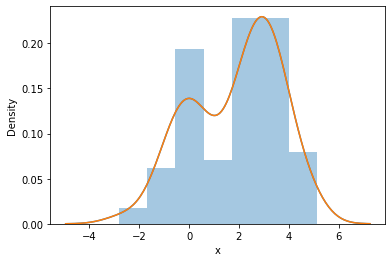

In [12]:
# Kernel Density Estimation (KDE) with different kernels
sns.distplot(df.x);
sns.kdeplot(df.x,
            kernel='gau',
            legend=False,);

<center><h2>Kernel Density Estimation Advantages:</h2></center>

- No need for model specification.
- Model any density shape.
- Unlike histograms, density estimates are smooth, continuous and differentiable.
- Easily generalize to higher dimensions.

- All other parametric/nonparametric density estimation methods, e.g.,
histograms, are asymptotically kernel methods.

[Source](https://www.cs.rutgers.edu/~elgammal/classes/cs536/lectures/Clustering.pdf)

<center><h2>What can you do with KDE estimates?</h2></center>

- [Find Waldo](https://www.boredpanda.com/easy-strategy-for-finding-waldo-dr-randal-s-olson/)

- Anomaly detection - Given a density estimate , we can say whether it is very unlikely.

- Classification - If we estimate the density for each class, we can simply
plug this estimate Naive Bayes’ classifier.

- Clustering - Given a point, climb the density until you reach a local maximum.

[Source](https://mdav.ece.gatech.edu/ece-6254-spring2017/notes/19-KDE-k-means.pdf)

<center><h2>Takeaways</h2></center>

- Parametric models assume a functional form to the data, thus require a fixed number of parameters.
- Nonparametric models do __not__ assume a functional form to the data, thus the number of parameters are not fixed.
- Kernel Density Estimation (KDE) estimates a function based on each data observation without assuming a functional form  of the data.
- KDE has two hyperparameters:
     1. Kernel - The filter at each datapoint.
     1. Bandwidth - A width of the filter.
- KDE can create density-based clusters without assuming a functional form of the data.

<center><h2>Sources of Inspiration</h2></center>

- https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/

 <br>
<br> 
<br>

----